In [1]:
import time
import torch
from torch import nn
import torchvision
import torchlens as tl
import visualpriors

In [ ]:
model = torchvision.models.AlexNet()
x = torch.rand(1, 3, 224, 224)

model_history = tl.log_forward_pass(model, x, vis_opt='unrolled')
# print(model_history)

In [2]:

import os 
import sys 
sys.path.insert(0, os.path.join('/root/workspace/RT-DETR/rtdetrv2_pytorch/tools', '..'))
print(sys.path)
from src.core import YAMLConfig
config = "../configs/rtdetrv2/rtdetrv2_r18vd_120e_coco.yml"
cfg = YAMLConfig(config, resume=False)
class Model(nn.Module):
    def __init__(self, ) -> None:
        super().__init__()
        self.model = cfg.model.deploy()
        self.postprocessor = cfg.postprocessor.deploy()
        
    def forward(self, images, orig_target_sizes):
        outputs = self.model(images)
        outputs = self.postprocessor(outputs, orig_target_sizes)
        return outputs
class TestModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(20, 20)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(x)
        x = self.fc(x)
        x = self.activation(x)
        return x  

model = Model() 

['/root/workspace/RT-DETR/rtdetrv2_pytorch/tools/..', '/root/miniconda3/envs/rtdetr/lib/python310.zip', '/root/miniconda3/envs/rtdetr/lib/python3.10', '/root/miniconda3/envs/rtdetr/lib/python3.10/lib-dynload', '', '/root/miniconda3/envs/rtdetr/lib/python3.10/site-packages', '/root/workspace/TensorRT-v10.7.0/tools/pytorch-quantization', '/root/miniconda3/envs/rtdetr/lib/python3.10/site-packages/setuptools/_vendor', '/tmp/tmp0yxjr9e3']
Load PResNet18 state_dict


In [ ]:

data = torch.rand(1, 3, 640, 640)
size = torch.tensor([[640, 640]])
model_history = tl.log_forward_pass(model.model.backbone, (data), vis_opt='unrolled')

In [6]:
model.model.encoder

HybridEncoder(
  (input_proj): ModuleList(
    (0): Sequential(
      (conv): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (norm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Sequential(
      (conv): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (norm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): Sequential(
      (conv): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (norm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (encoder): ModuleList(
    (0): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=1024, bias=True)
 

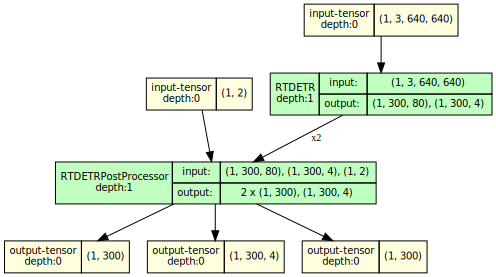

In [14]:
from torchview import draw_graph

data = torch.rand(1, 3, 640, 640)
size = torch.tensor([[640, 640]])
# device='meta' -> no memory is consumed for visualization
model_graph = draw_graph(model, input_data=[data, size], device='meta', expand_nested=True, depth=1)
model_graph.visual_graph

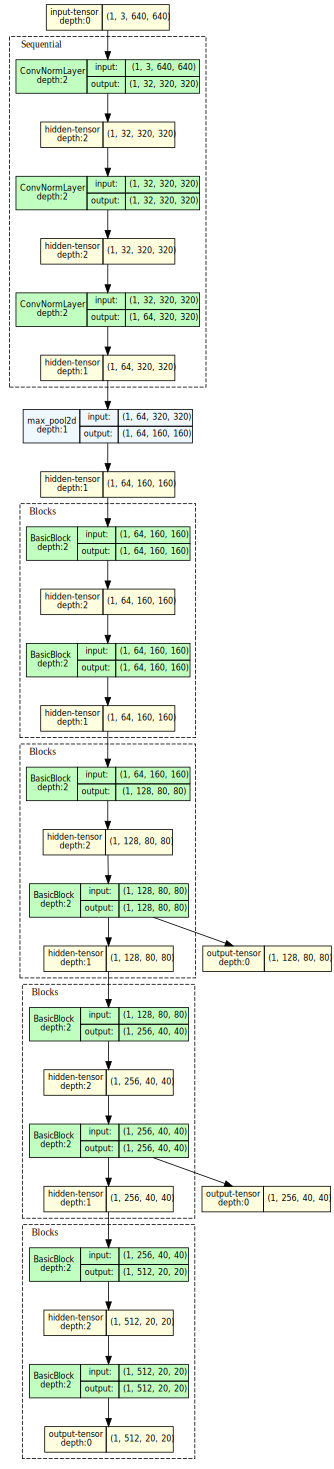

In [15]:
model_graph = draw_graph(model.model.backbone, input_data=[data], device='meta', expand_nested=True, depth=2, hide_inner_tensors=False)
model_graph.visual_graph

In [13]:
model.model.backbone

PResNet(
  (conv1): Sequential(
    (conv1_1): ConvNormLayer(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace=True)
    )
    (conv1_2): ConvNormLayer(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace=True)
    )
    (conv1_3): ConvNormLayer(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace=True)
    )
  )
  (res_layers): ModuleList(
    (0): Blocks(
      (blocks): ModuleList(
        (0): BasicBlock(
          (short): ConvNormLayer(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), b